**Dataset preparation for Model Training**

**Necessery libraries are imported.**

In [ ]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


**Dataset Preparation:**

The foundation of the project lies in a carefully curated dataset that encompasses diverse scenarios of mask-wearing behaviors.Dataset name is Face mask detector(mask ,not mask, incorrect mask) collected from Kaggle. The dataset is divided into three classes—Mask, No Mask, and Improper Mask—enabling the model to distinguish between different states of mask compliance. There are in total 2079 images. Each image undergoes preprocessing, including mean subtraction and resizing, ensuring uniformity in the input data.


In [ ]:
DATA_DIR = 'C:\\Users\\Rahiq\\Desktop\\alex\\dataset_modified'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [ ]:
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)

print(CATEGORIES)

['incorrect_mask', 'without_mask', 'with_mask']


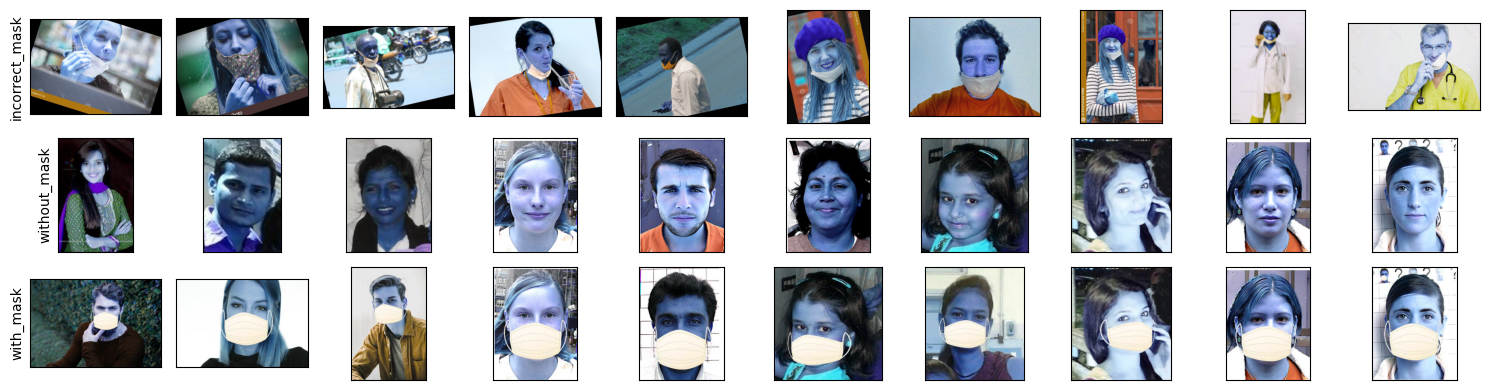

In [ ]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(3,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()
plt.show()

**In the bellow code**, the loop iterates through each category, loads the first 10 images from their respective directories, and displays them in a 3x10 grid within a single figure. The images are read using OpenCV, and the resulting array is plotted using plt.imshow. If it's the first image in a row, a y-axis label with the category name is added. The x and y ticks are removed for clarity, and the layout is adjusted to prevent overlap. This visualization provides a concise overview of the dataset, aiding in understanding the content and structure of the image data for each category.

In [ ]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(training_data))

100%|██████████| 552/552 [00:02<00:00, 201.95it/s]

1662


**In this step,** Validation and test datasets are prepared for a machine learning model. The first block focuses on the validation dataset, where for each category, images are loaded from the specified directory, resized to a predefined size (IMG_SIZE), and appended to the valid_data list along with their corresponding class indices. The second block performs a similar operation for the test dataset, populating the test_data list. Exception handling is included to skip over any images that may cause errors during the loading process. The lengths of the resulting valid_data and test_data lists are printed, providing an insight into the number of samples available for model evaluation. These datasets are crucial for assessing the model's performance on unseen data during the validation and testing phases.







In [ ]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            valid_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(valid_data))

100%|██████████| 69/69 [00:00<00:00, 156.32it/s]

207


In [ ]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(test_data))

100%|██████████| 69/69 [00:00<00:00, 216.78it/s]

210


**Random shuffle of data is done here.**

In [ ]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

**In the bellow codes,** the image and label data from the previously created training, validation, and test datasets are organized into arrays suitable for model training and evaluation. For the training dataset, the image and label pairs from training_data are separated into X_train (image data) and Y_train (label data), and the shape of the resulting arrays is printed. Similarly, the validation and test datasets are processed, generating X_valid, Y_valid, X_test, and Y_test arrays. The images are converted to a consistent data type, reshaped to the specified dimensions (227x227x3), and the shapes of the final arrays are printed, providing an overview of the input data dimensions for the machine learning model. These preprocessed datasets are crucial for feeding into the model during the training and evaluation phases.

In [ ]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (1662, 227, 227, 3) Y_train= (1662,)


In [ ]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)

X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (207, 227, 227, 3) Y_valid= (207,)


In [ ]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (210, 227, 227, 3) Y_test= (210,)


**This code segment involves pickling**, a process of serializing and saving Python objects, to store the preprocessed training, validation, and test datasets as binary files. The X_train, Y_train, X_valid, Y_valid, X_test, and Y_test arrays are individually saved using the pickle.dump function. Each array is written to a corresponding pickle file, creating portable representations of the datasets. This serialization allows for efficient storage and retrieval of the data, facilitating ease of use in subsequent model training or evaluation without the need to preprocess the images and labels again. The resulting pickle files are stored in the specified directory for future access.

In [ ]:
pickle_out = open("./resources/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("./resources/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("./resources/X_valid.pickle","wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("./resources/Y_valid.pickle","wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open("./resources/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("./resources/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()